# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'
import helper

In [1]:

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:10<00:00, 5.64KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

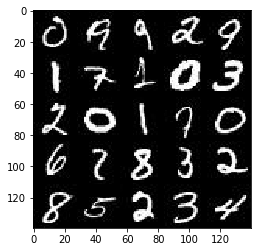

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

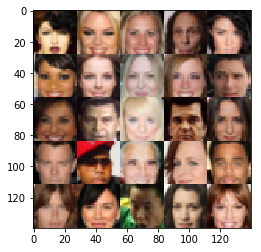

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, shape=(None,image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, shape=(), name="learning_rate")

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [67]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    #Define alpha to be used for leaky RELU
    alpha = 0.2
    
    #Define dropout rate
    dropout = 0.3


    
    with tf.variable_scope("discriminator", reuse=reuse):
        
        #Input is 28x28x3
        
        #Layer 1 will be a convolution layer with stride of 2 and 64 filters
        #Apply Leaky RELU to layer 1
        #Do not apply batch normalization to layer 1
        l1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="same", 
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        l1 = tf.maximum(l1 * alpha, l1)
        #Layer size at this point is 14x14x64
        
        #Layer 2 will be a convolution layer with a stride of 2 and 128 filters
        #Apply batch normaliztion and leaky RELU to this layer
        l2 = tf.layers.conv2d(l1, 128, 5, strides=2, padding="same", use_bias=False,
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        l2 = tf.layers.batch_normalization(l2)
        l2 = tf.layers.dropout(l2, dropout)
        l2 = tf.maximum(l2 * alpha, l2)
        #Layer size at this point is 7x7x128
        
        #Layer 3 will be a convolution layer with a stride of 2 and 256 filters
        #Apply batch normaliztion and leaky RELU to this layer
        l3 = tf.layers.conv2d(l2, 256, 4, strides=1, padding="valid", use_bias=False,
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        l3 = tf.layers.batch_normalization(l3)
        l3 = tf.layers.dropout(l3, dropout)
        l3 = tf.maximum(l3 * alpha, l3)
        #Layer size at this point is 4x4x256
        

        #Flatten this layer
        flat = tf.reshape(l3, (-1, 4 * 4 * 256))
        
        #Add a fully connected layer to get logits
        logits = tf.layers.dense(flat, 1)
        
        #Use sigmoid to get the output
        out = tf.sigmoid(logits)
        
        

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [68]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    #Define alpha to be used for leaky RELU
    alpha = 0.2
    
    
    #If is_train is True then do not reuse the variable scope, else reuse
    reuse = not is_train

    with tf.variable_scope("generator", reuse=reuse):
        
        #First a fully connected layer
        #We will reshape this layer into 4x4x512 to start the convolution stck
        l1 = tf.layers.dense(z, 4*4*512, use_bias=False)
        l1 = tf.reshape(l1,[-1, 4, 4, 512])
        
        #Apply batch normalization and leaky RELU
        l1 = tf.layers.batch_normalization(l1, training=is_train)
        l1 = tf.maximum(alpha * l1, l1)
        #At this point the layer size is 4x4x512
        
        #Layer 2 will be a convolution layer - transpose to increase the size
        #Use stride of 1 and filters as 256
        #Use kernel size of 4 and padding as "valid". This will ensure the resultant size is 7x7x256
        #Apply batch normalization and leaky RELU
        l2 = tf.layers.conv2d_transpose(l1, 256, 4, strides=1, padding="valid", use_bias=False,
                                       kernel_initializer=tf.contrib.layers.xavier_initializer())
        l2 = tf.layers.batch_normalization(l2, training=is_train)
        l2 = tf.maximum(alpha * l2, l2)
        #At this point the layer is 7*7*256

        #Layer 3 will be a convolution layer - transpose to increase the size
        #Use stride of 2 and filters as 128
        #Use kernel size of 5 and padding as "same"
        #Apply batch normalization and leaky RELU
        l3 = tf.layers.conv2d_transpose(l2, 128, 5, strides=2, padding="same", use_bias=False,
                                       kernel_initializer=tf.contrib.layers.xavier_initializer())
        l3 = tf.layers.batch_normalization(l3, training=is_train)
        l3 = tf.maximum(alpha * l3, l3)
        #At this point the layer is 14*14*128
        
        #Now generate the output logits. 
        #Use stride of 2 and filters as out_channel_dim
        #Do not apply batch normalization or leaky RELU
        logits = tf.layers.conv2d_transpose(l3, out_channel_dim, 5, strides=2, padding="same", use_bias=False,
                                           kernel_initializer=tf.contrib.layers.xavier_initializer())
        #At this point the layer is 28x28xOut_Channel_Dim
        
        #Use tanh to get the output
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [69]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    #For label smoothing
    smooth = 0.1
    
    #Get generated image model first
    gen_model = generator(input_z, out_channel_dim, is_train=True)
    
    #Get discriminator output for the real images
    real_out, real_logits = discriminator(input_real, reuse=False)
    
    #Get discriminator output for the generated images
    gen_out, gen_logits = discriminator(gen_model, reuse=True)
    
    #Calculate discriminator loss for real images
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=real_logits, labels=tf.ones_like(real_out) * (1 - smooth)))
    
    #Calculate discriminator loss for generated images
    d_loss_gen = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=gen_logits, labels=tf.zeros_like(gen_out)))
    
    #Calculate total discriminator loss
    d_loss = d_loss_real + d_loss_gen
    
    #Calculate generator loss
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=gen_logits, labels=tf.ones_like(gen_out)))

    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [70]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get all traininable variables and subequently identify the ones for generator and discriminator
    all_vars = tf.trainable_variables()
    g_vars = [var for var in all_vars if var.name.startswith("generator")]
    d_vars = [var for var in all_vars if var.name.startswith("discriminator")]
    
    #Ensure that train operations are wrapped in a with tf.control_dependencies block 
    #so the batch normalization layers can update their population statistics.
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        #Discriminator training operation
        d_training_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        #Generator training operation
        g_training_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_training_opt, g_training_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [71]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [72]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model    
    out_dim = data_shape[3]
    
    input_real, input_z, learning_rate_p = model_inputs(data_shape[1],data_shape[2],data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, out_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    show_every = 100
    print_every = 20
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                #Since the dataset will be in the range of -0.5 to 0.5, double it to be in the range of -1 to 1
                batch_images = batch_images * 2
                
                # Generate Z batch
                batch_z = np.random.uniform(-1, 1, size=[batch_size, z_dim])
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate_p: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{} - Step {}...".format(epoch_i+1, epochs, steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, out_dim, data_image_mode)
        #At the end of epochs
        train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
        train_loss_g = g_loss.eval({input_z: batch_z})

        print("Epoch {}/{} - Step {}...".format(epoch_i+1, epochs, steps),
              "Discriminator Loss: {:.4f}...".format(train_loss_d),
              "Generator Loss: {:.4f}".format(train_loss_g))
        show_generator_output(sess, 25, input_z, out_dim, data_image_mode)

                                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 - Step 20... Discriminator Loss: 1.3413... Generator Loss: 0.6434
Epoch 1/2 - Step 40... Discriminator Loss: 1.1660... Generator Loss: 0.8615
Epoch 1/2 - Step 60... Discriminator Loss: 1.4615... Generator Loss: 0.7104
Epoch 1/2 - Step 80... Discriminator Loss: 0.9859... Generator Loss: 1.0626
Epoch 1/2 - Step 100... Discriminator Loss: 1.4951... Generator Loss: 0.7709


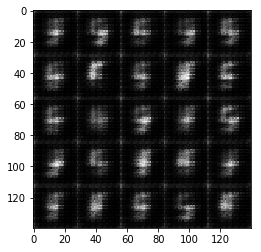

Epoch 1/2 - Step 120... Discriminator Loss: 1.2464... Generator Loss: 0.6775
Epoch 1/2 - Step 140... Discriminator Loss: 1.2632... Generator Loss: 0.7197
Epoch 1/2 - Step 160... Discriminator Loss: 1.2233... Generator Loss: 0.6443
Epoch 1/2 - Step 180... Discriminator Loss: 1.1370... Generator Loss: 1.0508
Epoch 1/2 - Step 200... Discriminator Loss: 0.8214... Generator Loss: 1.4022


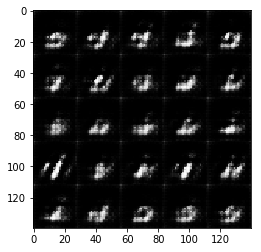

Epoch 1/2 - Step 220... Discriminator Loss: 0.8393... Generator Loss: 1.3815
Epoch 1/2 - Step 240... Discriminator Loss: 1.3786... Generator Loss: 0.9850
Epoch 1/2 - Step 260... Discriminator Loss: 1.3208... Generator Loss: 0.7989
Epoch 1/2 - Step 280... Discriminator Loss: 1.3377... Generator Loss: 1.0372
Epoch 1/2 - Step 300... Discriminator Loss: 1.5776... Generator Loss: 0.7661


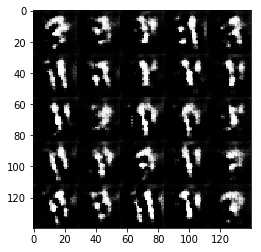

Epoch 1/2 - Step 320... Discriminator Loss: 1.1445... Generator Loss: 0.8921
Epoch 1/2 - Step 340... Discriminator Loss: 1.0917... Generator Loss: 1.0418
Epoch 1/2 - Step 360... Discriminator Loss: 1.3388... Generator Loss: 0.8431
Epoch 1/2 - Step 380... Discriminator Loss: 1.6417... Generator Loss: 0.7869
Epoch 1/2 - Step 400... Discriminator Loss: 1.2000... Generator Loss: 0.8019


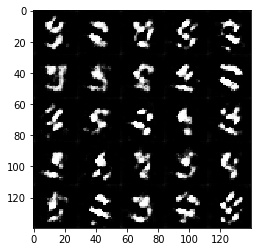

Epoch 1/2 - Step 420... Discriminator Loss: 1.1167... Generator Loss: 0.9665
Epoch 1/2 - Step 440... Discriminator Loss: 1.2329... Generator Loss: 0.6849
Epoch 1/2 - Step 460... Discriminator Loss: 1.1740... Generator Loss: 0.9528
Epoch 1/2 - Step 480... Discriminator Loss: 1.6891... Generator Loss: 0.3517
Epoch 1/2 - Step 500... Discriminator Loss: 1.0168... Generator Loss: 1.1722


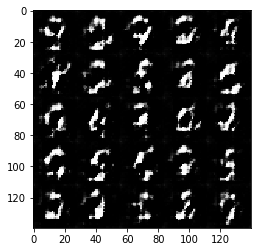

Epoch 1/2 - Step 520... Discriminator Loss: 1.1109... Generator Loss: 1.2885
Epoch 1/2 - Step 540... Discriminator Loss: 1.2610... Generator Loss: 0.9295
Epoch 1/2 - Step 560... Discriminator Loss: 0.8569... Generator Loss: 1.6862
Epoch 1/2 - Step 580... Discriminator Loss: 0.9959... Generator Loss: 1.0099
Epoch 1/2 - Step 600... Discriminator Loss: 1.1829... Generator Loss: 0.7277


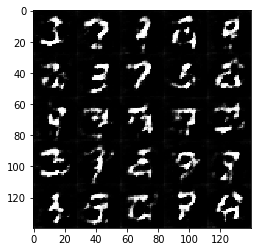

Epoch 1/2 - Step 620... Discriminator Loss: 1.0853... Generator Loss: 1.3183
Epoch 1/2 - Step 640... Discriminator Loss: 1.3172... Generator Loss: 0.6683
Epoch 1/2 - Step 660... Discriminator Loss: 1.1205... Generator Loss: 1.2185
Epoch 1/2 - Step 680... Discriminator Loss: 1.2471... Generator Loss: 0.9019
Epoch 1/2 - Step 700... Discriminator Loss: 1.1352... Generator Loss: 0.9992


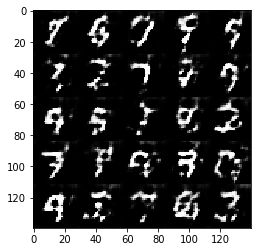

Epoch 1/2 - Step 720... Discriminator Loss: 1.1093... Generator Loss: 1.2044
Epoch 1/2 - Step 740... Discriminator Loss: 1.2222... Generator Loss: 1.0587
Epoch 1/2 - Step 760... Discriminator Loss: 1.1946... Generator Loss: 1.3164
Epoch 1/2 - Step 780... Discriminator Loss: 1.2965... Generator Loss: 1.1918
Epoch 1/2 - Step 800... Discriminator Loss: 1.2195... Generator Loss: 0.9925


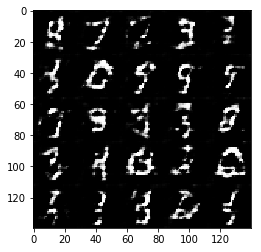

Epoch 1/2 - Step 820... Discriminator Loss: 1.0873... Generator Loss: 1.0531
Epoch 1/2 - Step 840... Discriminator Loss: 1.4182... Generator Loss: 0.8495
Epoch 1/2 - Step 860... Discriminator Loss: 1.4974... Generator Loss: 0.9337
Epoch 1/2 - Step 880... Discriminator Loss: 1.4000... Generator Loss: 0.6155
Epoch 1/2 - Step 900... Discriminator Loss: 1.3226... Generator Loss: 0.8784


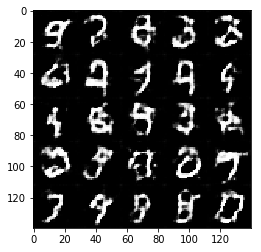

Epoch 1/2 - Step 920... Discriminator Loss: 1.4386... Generator Loss: 0.7666
Epoch 1/2 - Step 940... Discriminator Loss: 1.2112... Generator Loss: 0.7788
Epoch 1/2 - Step 960... Discriminator Loss: 1.1531... Generator Loss: 0.9307
Epoch 1/2 - Step 980... Discriminator Loss: 1.3634... Generator Loss: 0.8039
Epoch 1/2 - Step 1000... Discriminator Loss: 1.2290... Generator Loss: 0.9219


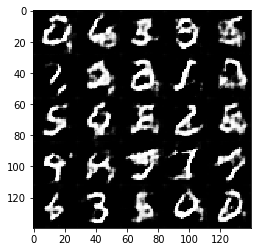

Epoch 1/2 - Step 1020... Discriminator Loss: 1.3230... Generator Loss: 0.8643
Epoch 1/2 - Step 1040... Discriminator Loss: 1.1786... Generator Loss: 0.8048
Epoch 1/2 - Step 1060... Discriminator Loss: 1.3482... Generator Loss: 0.6680
Epoch 1/2 - Step 1080... Discriminator Loss: 1.2742... Generator Loss: 0.9057
Epoch 1/2 - Step 1100... Discriminator Loss: 1.2956... Generator Loss: 0.8258


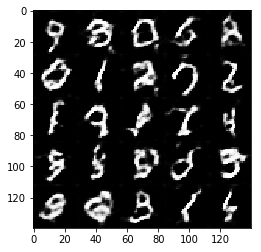

Epoch 1/2 - Step 1120... Discriminator Loss: 1.2975... Generator Loss: 0.7557
Epoch 1/2 - Step 1140... Discriminator Loss: 1.1933... Generator Loss: 0.9174
Epoch 1/2 - Step 1160... Discriminator Loss: 1.2337... Generator Loss: 0.9479
Epoch 1/2 - Step 1180... Discriminator Loss: 1.3047... Generator Loss: 0.7732
Epoch 1/2 - Step 1200... Discriminator Loss: 1.2655... Generator Loss: 0.8586


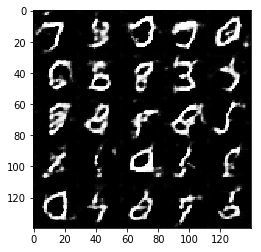

Epoch 1/2 - Step 1220... Discriminator Loss: 1.2817... Generator Loss: 0.7300
Epoch 1/2 - Step 1240... Discriminator Loss: 1.2869... Generator Loss: 0.9552
Epoch 1/2 - Step 1260... Discriminator Loss: 1.2446... Generator Loss: 0.7921
Epoch 1/2 - Step 1280... Discriminator Loss: 1.2365... Generator Loss: 0.9895
Epoch 1/2 - Step 1300... Discriminator Loss: 1.2495... Generator Loss: 0.8587


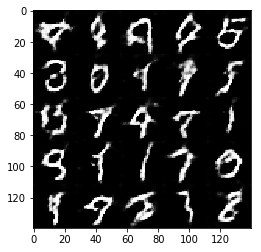

Epoch 1/2 - Step 1320... Discriminator Loss: 1.3271... Generator Loss: 0.7985
Epoch 1/2 - Step 1340... Discriminator Loss: 1.2705... Generator Loss: 0.7996
Epoch 1/2 - Step 1360... Discriminator Loss: 1.3045... Generator Loss: 0.7661
Epoch 1/2 - Step 1380... Discriminator Loss: 1.2375... Generator Loss: 0.7809
Epoch 1/2 - Step 1400... Discriminator Loss: 1.2370... Generator Loss: 1.1088


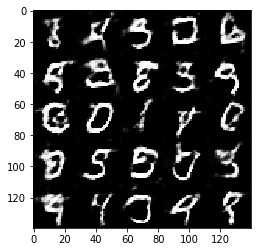

Epoch 1/2 - Step 1420... Discriminator Loss: 1.1833... Generator Loss: 1.0042
Epoch 1/2 - Step 1440... Discriminator Loss: 1.3157... Generator Loss: 0.7029
Epoch 1/2 - Step 1460... Discriminator Loss: 1.2866... Generator Loss: 0.7565
Epoch 1/2 - Step 1480... Discriminator Loss: 1.3979... Generator Loss: 0.9893
Epoch 1/2 - Step 1500... Discriminator Loss: 1.2227... Generator Loss: 0.9189


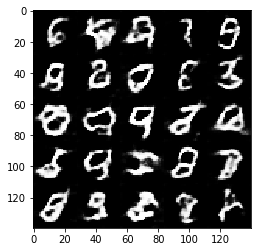

Epoch 1/2 - Step 1520... Discriminator Loss: 1.2196... Generator Loss: 0.9215
Epoch 1/2 - Step 1540... Discriminator Loss: 1.3805... Generator Loss: 0.7907
Epoch 1/2 - Step 1560... Discriminator Loss: 1.2281... Generator Loss: 1.0764
Epoch 1/2 - Step 1580... Discriminator Loss: 1.2469... Generator Loss: 1.2075
Epoch 1/2 - Step 1600... Discriminator Loss: 1.2213... Generator Loss: 0.8772


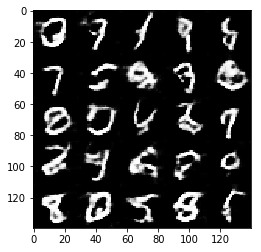

Epoch 1/2 - Step 1620... Discriminator Loss: 1.1794... Generator Loss: 1.0286
Epoch 1/2 - Step 1640... Discriminator Loss: 1.2419... Generator Loss: 0.7856
Epoch 1/2 - Step 1660... Discriminator Loss: 1.1745... Generator Loss: 0.9518
Epoch 1/2 - Step 1680... Discriminator Loss: 1.2612... Generator Loss: 0.9039
Epoch 1/2 - Step 1700... Discriminator Loss: 1.3662... Generator Loss: 0.9425


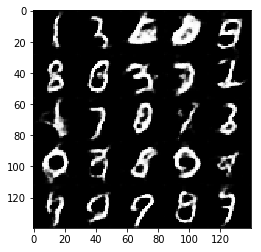

Epoch 1/2 - Step 1720... Discriminator Loss: 1.3126... Generator Loss: 0.7757
Epoch 1/2 - Step 1740... Discriminator Loss: 1.3720... Generator Loss: 1.0409
Epoch 1/2 - Step 1760... Discriminator Loss: 1.2773... Generator Loss: 0.8213
Epoch 1/2 - Step 1780... Discriminator Loss: 1.2234... Generator Loss: 0.9633
Epoch 1/2 - Step 1800... Discriminator Loss: 1.2989... Generator Loss: 0.7573


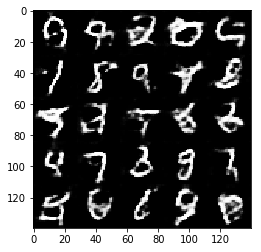

Epoch 1/2 - Step 1820... Discriminator Loss: 1.3320... Generator Loss: 0.7499
Epoch 1/2 - Step 1840... Discriminator Loss: 1.2128... Generator Loss: 1.0703
Epoch 1/2 - Step 1860... Discriminator Loss: 1.2456... Generator Loss: 1.1223
Epoch 2/2 - Step 1880... Discriminator Loss: 1.1859... Generator Loss: 1.0308
Epoch 2/2 - Step 1900... Discriminator Loss: 1.1412... Generator Loss: 0.9242


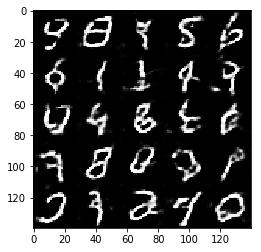

Epoch 2/2 - Step 1920... Discriminator Loss: 1.2228... Generator Loss: 0.9591
Epoch 2/2 - Step 1940... Discriminator Loss: 1.0769... Generator Loss: 0.9860
Epoch 2/2 - Step 1960... Discriminator Loss: 1.1426... Generator Loss: 1.0592
Epoch 2/2 - Step 1980... Discriminator Loss: 1.2830... Generator Loss: 1.1072
Epoch 2/2 - Step 2000... Discriminator Loss: 1.2434... Generator Loss: 0.8767


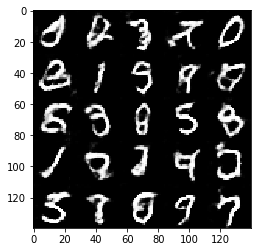

Epoch 2/2 - Step 2020... Discriminator Loss: 1.2338... Generator Loss: 0.7958
Epoch 2/2 - Step 2040... Discriminator Loss: 1.1732... Generator Loss: 0.9914
Epoch 2/2 - Step 2060... Discriminator Loss: 1.2156... Generator Loss: 0.9696
Epoch 2/2 - Step 2080... Discriminator Loss: 1.2859... Generator Loss: 0.7807
Epoch 2/2 - Step 2100... Discriminator Loss: 1.1709... Generator Loss: 0.9669


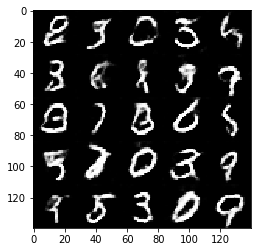

Epoch 2/2 - Step 2120... Discriminator Loss: 1.3540... Generator Loss: 0.8789
Epoch 2/2 - Step 2140... Discriminator Loss: 1.2556... Generator Loss: 0.9006
Epoch 2/2 - Step 2160... Discriminator Loss: 1.4043... Generator Loss: 0.9067
Epoch 2/2 - Step 2180... Discriminator Loss: 1.2453... Generator Loss: 0.7199
Epoch 2/2 - Step 2200... Discriminator Loss: 1.2716... Generator Loss: 0.8454


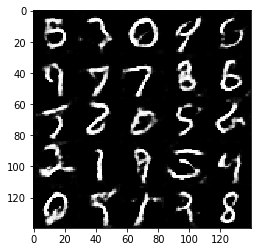

Epoch 2/2 - Step 2220... Discriminator Loss: 1.3602... Generator Loss: 0.7362
Epoch 2/2 - Step 2240... Discriminator Loss: 1.3223... Generator Loss: 0.8975
Epoch 2/2 - Step 2260... Discriminator Loss: 1.2891... Generator Loss: 0.9444
Epoch 2/2 - Step 2280... Discriminator Loss: 1.2247... Generator Loss: 0.9073
Epoch 2/2 - Step 2300... Discriminator Loss: 1.1825... Generator Loss: 1.1213


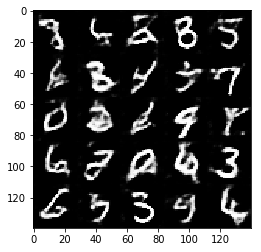

Epoch 2/2 - Step 2320... Discriminator Loss: 1.3799... Generator Loss: 0.9417
Epoch 2/2 - Step 2340... Discriminator Loss: 1.3117... Generator Loss: 0.7716
Epoch 2/2 - Step 2360... Discriminator Loss: 1.1835... Generator Loss: 0.8913
Epoch 2/2 - Step 2380... Discriminator Loss: 1.2921... Generator Loss: 0.9781
Epoch 2/2 - Step 2400... Discriminator Loss: 1.0771... Generator Loss: 1.1356


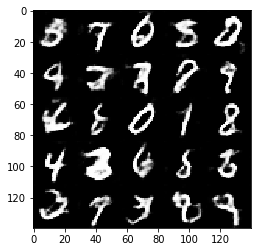

Epoch 2/2 - Step 2420... Discriminator Loss: 1.3350... Generator Loss: 1.0057
Epoch 2/2 - Step 2440... Discriminator Loss: 1.2085... Generator Loss: 1.1748
Epoch 2/2 - Step 2460... Discriminator Loss: 1.2549... Generator Loss: 0.8404
Epoch 2/2 - Step 2480... Discriminator Loss: 1.2178... Generator Loss: 0.9533
Epoch 2/2 - Step 2500... Discriminator Loss: 1.2350... Generator Loss: 0.9648


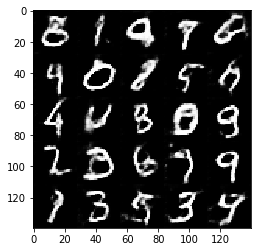

Epoch 2/2 - Step 2520... Discriminator Loss: 1.2039... Generator Loss: 1.0804
Epoch 2/2 - Step 2540... Discriminator Loss: 1.2439... Generator Loss: 0.7986
Epoch 2/2 - Step 2560... Discriminator Loss: 1.2192... Generator Loss: 1.1657
Epoch 2/2 - Step 2580... Discriminator Loss: 1.1551... Generator Loss: 1.2530
Epoch 2/2 - Step 2600... Discriminator Loss: 1.1686... Generator Loss: 0.9036


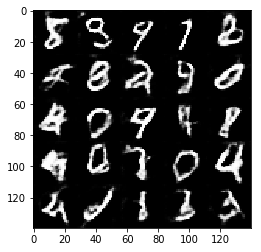

Epoch 2/2 - Step 2620... Discriminator Loss: 1.1472... Generator Loss: 1.0792
Epoch 2/2 - Step 2640... Discriminator Loss: 1.2302... Generator Loss: 1.0439
Epoch 2/2 - Step 2660... Discriminator Loss: 1.1654... Generator Loss: 0.9698
Epoch 2/2 - Step 2680... Discriminator Loss: 1.2708... Generator Loss: 0.9993
Epoch 2/2 - Step 2700... Discriminator Loss: 1.2337... Generator Loss: 1.3130


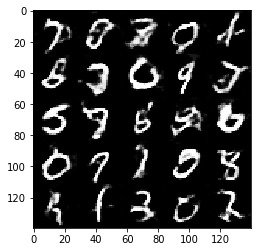

Epoch 2/2 - Step 2720... Discriminator Loss: 1.1942... Generator Loss: 0.9777
Epoch 2/2 - Step 2740... Discriminator Loss: 1.1101... Generator Loss: 1.1910
Epoch 2/2 - Step 2760... Discriminator Loss: 1.1545... Generator Loss: 1.0034
Epoch 2/2 - Step 2780... Discriminator Loss: 1.1804... Generator Loss: 0.8915
Epoch 2/2 - Step 2800... Discriminator Loss: 1.1188... Generator Loss: 0.9687


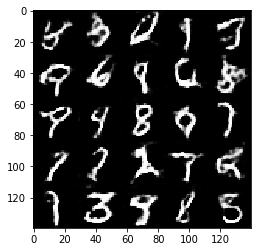

Epoch 2/2 - Step 2820... Discriminator Loss: 1.3158... Generator Loss: 0.8167
Epoch 2/2 - Step 2840... Discriminator Loss: 1.2698... Generator Loss: 1.0065
Epoch 2/2 - Step 2860... Discriminator Loss: 1.2202... Generator Loss: 0.8610
Epoch 2/2 - Step 2880... Discriminator Loss: 1.2563... Generator Loss: 0.9827
Epoch 2/2 - Step 2900... Discriminator Loss: 1.2321... Generator Loss: 0.8345


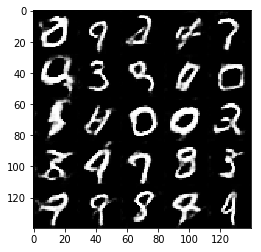

Epoch 2/2 - Step 2920... Discriminator Loss: 1.2315... Generator Loss: 1.0103
Epoch 2/2 - Step 2940... Discriminator Loss: 1.3557... Generator Loss: 0.6447
Epoch 2/2 - Step 2960... Discriminator Loss: 1.1518... Generator Loss: 1.1166
Epoch 2/2 - Step 2980... Discriminator Loss: 1.3453... Generator Loss: 0.9161
Epoch 2/2 - Step 3000... Discriminator Loss: 1.1655... Generator Loss: 0.9094


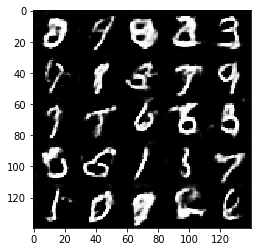

Epoch 2/2 - Step 3020... Discriminator Loss: 1.2294... Generator Loss: 0.9809
Epoch 2/2 - Step 3040... Discriminator Loss: 1.2156... Generator Loss: 0.9716
Epoch 2/2 - Step 3060... Discriminator Loss: 1.1457... Generator Loss: 0.9395
Epoch 2/2 - Step 3080... Discriminator Loss: 1.2648... Generator Loss: 0.9473
Epoch 2/2 - Step 3100... Discriminator Loss: 1.1992... Generator Loss: 0.8782


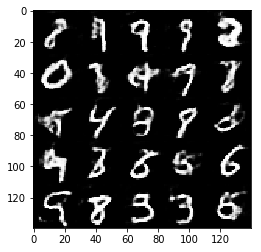

Epoch 2/2 - Step 3120... Discriminator Loss: 1.1868... Generator Loss: 0.9239
Epoch 2/2 - Step 3140... Discriminator Loss: 1.2280... Generator Loss: 1.1671
Epoch 2/2 - Step 3160... Discriminator Loss: 1.2277... Generator Loss: 0.8400
Epoch 2/2 - Step 3180... Discriminator Loss: 1.1729... Generator Loss: 0.8523
Epoch 2/2 - Step 3200... Discriminator Loss: 1.2521... Generator Loss: 0.8757


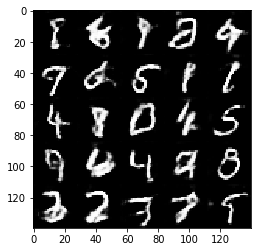

Epoch 2/2 - Step 3220... Discriminator Loss: 1.2380... Generator Loss: 1.3493
Epoch 2/2 - Step 3240... Discriminator Loss: 1.1800... Generator Loss: 0.9383
Epoch 2/2 - Step 3260... Discriminator Loss: 1.2049... Generator Loss: 0.9129
Epoch 2/2 - Step 3280... Discriminator Loss: 1.2313... Generator Loss: 1.2544
Epoch 2/2 - Step 3300... Discriminator Loss: 1.1628... Generator Loss: 1.1078


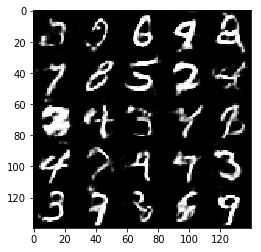

Epoch 2/2 - Step 3320... Discriminator Loss: 1.2462... Generator Loss: 1.0503
Epoch 2/2 - Step 3340... Discriminator Loss: 1.0434... Generator Loss: 1.0882
Epoch 2/2 - Step 3360... Discriminator Loss: 1.2525... Generator Loss: 1.1140
Epoch 2/2 - Step 3380... Discriminator Loss: 1.2191... Generator Loss: 1.0938
Epoch 2/2 - Step 3400... Discriminator Loss: 1.1302... Generator Loss: 1.0181


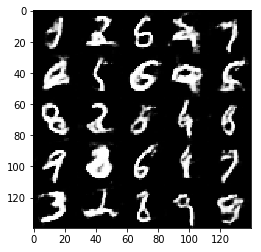

Epoch 2/2 - Step 3420... Discriminator Loss: 1.2604... Generator Loss: 0.7293
Epoch 2/2 - Step 3440... Discriminator Loss: 1.1745... Generator Loss: 0.9296
Epoch 2/2 - Step 3460... Discriminator Loss: 1.2587... Generator Loss: 0.8624
Epoch 2/2 - Step 3480... Discriminator Loss: 1.2326... Generator Loss: 1.0752
Epoch 2/2 - Step 3500... Discriminator Loss: 1.1245... Generator Loss: 0.9958


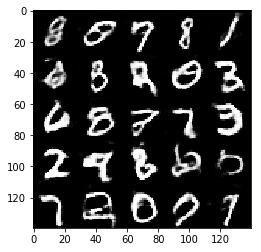

Epoch 2/2 - Step 3520... Discriminator Loss: 1.1660... Generator Loss: 1.1004
Epoch 2/2 - Step 3540... Discriminator Loss: 1.2027... Generator Loss: 1.5520
Epoch 2/2 - Step 3560... Discriminator Loss: 1.2550... Generator Loss: 1.0674
Epoch 2/2 - Step 3580... Discriminator Loss: 1.2536... Generator Loss: 0.7895
Epoch 2/2 - Step 3600... Discriminator Loss: 1.2842... Generator Loss: 0.8631


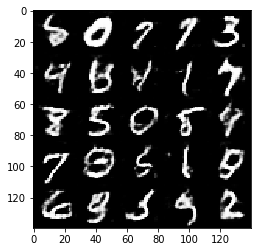

Epoch 2/2 - Step 3620... Discriminator Loss: 1.1479... Generator Loss: 1.0832
Epoch 2/2 - Step 3640... Discriminator Loss: 1.2815... Generator Loss: 0.9565
Epoch 2/2 - Step 3660... Discriminator Loss: 1.2810... Generator Loss: 0.9579
Epoch 2/2 - Step 3680... Discriminator Loss: 1.1636... Generator Loss: 1.1053
Epoch 2/2 - Step 3700... Discriminator Loss: 1.3456... Generator Loss: 0.5719


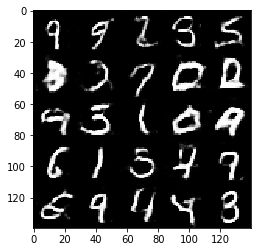

Epoch 2/2 - Step 3720... Discriminator Loss: 1.1944... Generator Loss: 0.8700
Epoch 2/2 - Step 3740... Discriminator Loss: 1.2739... Generator Loss: 0.9266
Epoch 2/2 - Step 3750... Discriminator Loss: 1.0494... Generator Loss: 1.0636


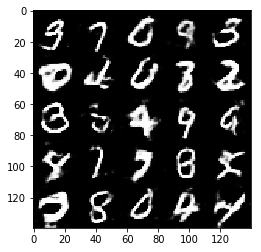

In [73]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 - Step 20... Discriminator Loss: 1.1700... Generator Loss: 0.9663
Epoch 1/1 - Step 40... Discriminator Loss: 1.1177... Generator Loss: 0.9712
Epoch 1/1 - Step 60... Discriminator Loss: 1.4329... Generator Loss: 0.7879
Epoch 1/1 - Step 80... Discriminator Loss: 0.9441... Generator Loss: 0.9935
Epoch 1/1 - Step 100... Discriminator Loss: 1.2810... Generator Loss: 0.7746


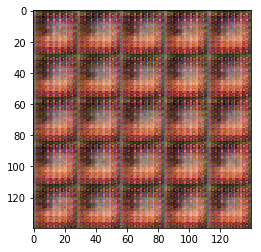

Epoch 1/1 - Step 120... Discriminator Loss: 1.3731... Generator Loss: 0.7765
Epoch 1/1 - Step 140... Discriminator Loss: 1.1609... Generator Loss: 1.0016
Epoch 1/1 - Step 160... Discriminator Loss: 1.3023... Generator Loss: 0.8709
Epoch 1/1 - Step 180... Discriminator Loss: 1.0035... Generator Loss: 1.0543
Epoch 1/1 - Step 200... Discriminator Loss: 1.1317... Generator Loss: 1.3865


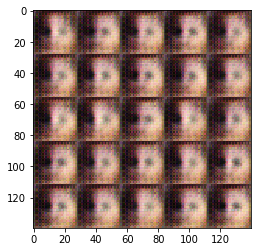

Epoch 1/1 - Step 220... Discriminator Loss: 1.1154... Generator Loss: 1.0426
Epoch 1/1 - Step 240... Discriminator Loss: 1.3901... Generator Loss: 1.0356
Epoch 1/1 - Step 260... Discriminator Loss: 1.1293... Generator Loss: 1.1324
Epoch 1/1 - Step 280... Discriminator Loss: 0.7678... Generator Loss: 1.4713
Epoch 1/1 - Step 300... Discriminator Loss: 0.9629... Generator Loss: 2.1710


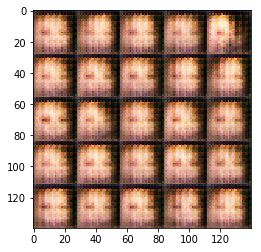

Epoch 1/1 - Step 320... Discriminator Loss: 1.1837... Generator Loss: 1.0748
Epoch 1/1 - Step 340... Discriminator Loss: 1.0358... Generator Loss: 1.0504
Epoch 1/1 - Step 360... Discriminator Loss: 1.2479... Generator Loss: 1.1529
Epoch 1/1 - Step 380... Discriminator Loss: 1.1268... Generator Loss: 1.0565
Epoch 1/1 - Step 400... Discriminator Loss: 1.2402... Generator Loss: 1.0125


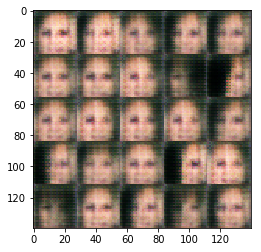

Epoch 1/1 - Step 420... Discriminator Loss: 1.1936... Generator Loss: 1.0194
Epoch 1/1 - Step 440... Discriminator Loss: 1.2397... Generator Loss: 0.8137
Epoch 1/1 - Step 460... Discriminator Loss: 1.2976... Generator Loss: 1.0254
Epoch 1/1 - Step 480... Discriminator Loss: 1.0993... Generator Loss: 1.0900
Epoch 1/1 - Step 500... Discriminator Loss: 1.0580... Generator Loss: 1.0350


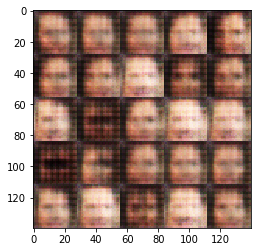

Epoch 1/1 - Step 520... Discriminator Loss: 1.0962... Generator Loss: 0.9803
Epoch 1/1 - Step 540... Discriminator Loss: 1.1437... Generator Loss: 0.9764
Epoch 1/1 - Step 560... Discriminator Loss: 1.0041... Generator Loss: 1.1796
Epoch 1/1 - Step 580... Discriminator Loss: 1.2361... Generator Loss: 1.1031
Epoch 1/1 - Step 600... Discriminator Loss: 1.0756... Generator Loss: 1.1102


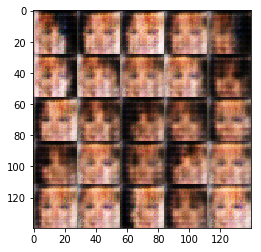

Epoch 1/1 - Step 620... Discriminator Loss: 1.0905... Generator Loss: 1.1066
Epoch 1/1 - Step 640... Discriminator Loss: 1.4545... Generator Loss: 0.8431
Epoch 1/1 - Step 660... Discriminator Loss: 1.2699... Generator Loss: 0.9378
Epoch 1/1 - Step 680... Discriminator Loss: 1.2580... Generator Loss: 0.9685
Epoch 1/1 - Step 700... Discriminator Loss: 1.1863... Generator Loss: 0.9697


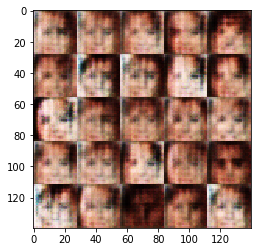

Epoch 1/1 - Step 720... Discriminator Loss: 1.2327... Generator Loss: 0.8832
Epoch 1/1 - Step 740... Discriminator Loss: 1.2836... Generator Loss: 0.9472
Epoch 1/1 - Step 760... Discriminator Loss: 1.2718... Generator Loss: 0.9760
Epoch 1/1 - Step 780... Discriminator Loss: 1.3679... Generator Loss: 0.8116
Epoch 1/1 - Step 800... Discriminator Loss: 1.3613... Generator Loss: 0.8761


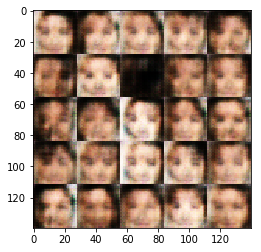

Epoch 1/1 - Step 820... Discriminator Loss: 1.3911... Generator Loss: 0.7617
Epoch 1/1 - Step 840... Discriminator Loss: 1.2168... Generator Loss: 0.8744
Epoch 1/1 - Step 860... Discriminator Loss: 1.3268... Generator Loss: 0.8088
Epoch 1/1 - Step 880... Discriminator Loss: 1.3115... Generator Loss: 0.8795
Epoch 1/1 - Step 900... Discriminator Loss: 1.3297... Generator Loss: 0.9039


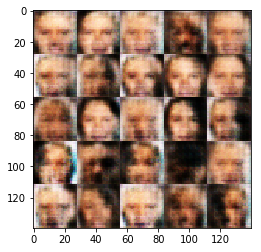

Epoch 1/1 - Step 920... Discriminator Loss: 1.4542... Generator Loss: 0.7902
Epoch 1/1 - Step 940... Discriminator Loss: 1.3377... Generator Loss: 0.8211
Epoch 1/1 - Step 960... Discriminator Loss: 1.2722... Generator Loss: 0.8384
Epoch 1/1 - Step 980... Discriminator Loss: 1.2456... Generator Loss: 0.9095
Epoch 1/1 - Step 1000... Discriminator Loss: 1.2486... Generator Loss: 0.9624


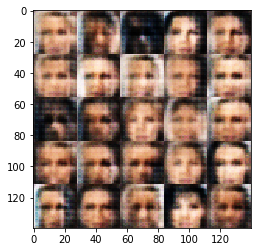

Epoch 1/1 - Step 1020... Discriminator Loss: 1.1185... Generator Loss: 0.8622
Epoch 1/1 - Step 1040... Discriminator Loss: 1.3442... Generator Loss: 0.8830
Epoch 1/1 - Step 1060... Discriminator Loss: 1.2426... Generator Loss: 0.8582
Epoch 1/1 - Step 1080... Discriminator Loss: 1.4123... Generator Loss: 0.8239
Epoch 1/1 - Step 1100... Discriminator Loss: 1.3411... Generator Loss: 0.9187


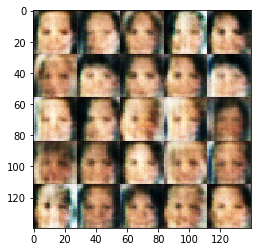

Epoch 1/1 - Step 1120... Discriminator Loss: 1.1633... Generator Loss: 0.9238
Epoch 1/1 - Step 1140... Discriminator Loss: 1.3669... Generator Loss: 0.8221
Epoch 1/1 - Step 1160... Discriminator Loss: 1.3484... Generator Loss: 0.8285
Epoch 1/1 - Step 1180... Discriminator Loss: 1.2247... Generator Loss: 0.8735
Epoch 1/1 - Step 1200... Discriminator Loss: 1.3170... Generator Loss: 0.8433


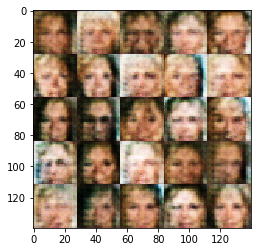

Epoch 1/1 - Step 1220... Discriminator Loss: 1.2768... Generator Loss: 0.9076
Epoch 1/1 - Step 1240... Discriminator Loss: 1.4532... Generator Loss: 0.7766
Epoch 1/1 - Step 1260... Discriminator Loss: 1.3491... Generator Loss: 0.8151
Epoch 1/1 - Step 1280... Discriminator Loss: 1.2628... Generator Loss: 0.8629
Epoch 1/1 - Step 1300... Discriminator Loss: 1.4086... Generator Loss: 0.8726


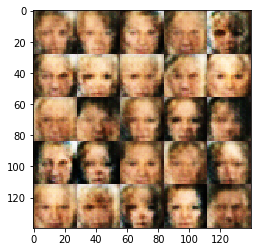

Epoch 1/1 - Step 1320... Discriminator Loss: 1.3890... Generator Loss: 0.7758
Epoch 1/1 - Step 1340... Discriminator Loss: 1.2781... Generator Loss: 0.8472
Epoch 1/1 - Step 1360... Discriminator Loss: 1.4275... Generator Loss: 0.8164
Epoch 1/1 - Step 1380... Discriminator Loss: 1.2650... Generator Loss: 0.8848
Epoch 1/1 - Step 1400... Discriminator Loss: 1.3722... Generator Loss: 0.8291


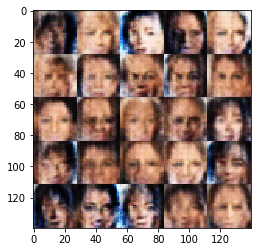

Epoch 1/1 - Step 1420... Discriminator Loss: 1.2852... Generator Loss: 0.8711
Epoch 1/1 - Step 1440... Discriminator Loss: 1.3290... Generator Loss: 0.8346
Epoch 1/1 - Step 1460... Discriminator Loss: 1.2829... Generator Loss: 0.8804
Epoch 1/1 - Step 1480... Discriminator Loss: 1.3419... Generator Loss: 0.8398
Epoch 1/1 - Step 1500... Discriminator Loss: 1.2895... Generator Loss: 0.8666


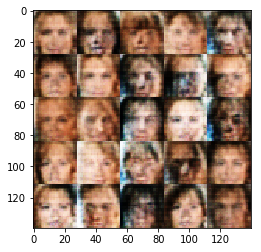

Epoch 1/1 - Step 1520... Discriminator Loss: 1.3092... Generator Loss: 0.8978
Epoch 1/1 - Step 1540... Discriminator Loss: 1.3068... Generator Loss: 0.9232
Epoch 1/1 - Step 1560... Discriminator Loss: 1.2839... Generator Loss: 0.8047
Epoch 1/1 - Step 1580... Discriminator Loss: 1.2981... Generator Loss: 0.9554
Epoch 1/1 - Step 1600... Discriminator Loss: 1.2284... Generator Loss: 0.8461


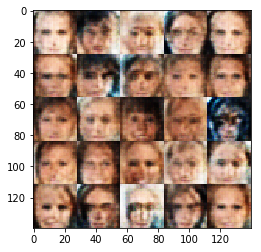

Epoch 1/1 - Step 1620... Discriminator Loss: 1.2652... Generator Loss: 0.8639
Epoch 1/1 - Step 1640... Discriminator Loss: 1.4558... Generator Loss: 0.7437
Epoch 1/1 - Step 1660... Discriminator Loss: 1.2993... Generator Loss: 0.8126
Epoch 1/1 - Step 1680... Discriminator Loss: 1.3443... Generator Loss: 0.8556
Epoch 1/1 - Step 1700... Discriminator Loss: 1.4101... Generator Loss: 0.8405


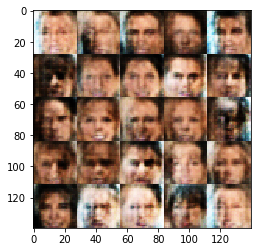

Epoch 1/1 - Step 1720... Discriminator Loss: 1.3544... Generator Loss: 0.7398
Epoch 1/1 - Step 1740... Discriminator Loss: 1.3060... Generator Loss: 0.8458
Epoch 1/1 - Step 1760... Discriminator Loss: 1.3158... Generator Loss: 0.8250
Epoch 1/1 - Step 1780... Discriminator Loss: 1.2990... Generator Loss: 0.9057
Epoch 1/1 - Step 1800... Discriminator Loss: 1.2761... Generator Loss: 0.8838


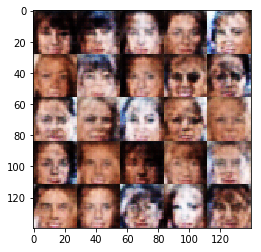

Epoch 1/1 - Step 1820... Discriminator Loss: 1.3227... Generator Loss: 0.7994
Epoch 1/1 - Step 1840... Discriminator Loss: 1.3518... Generator Loss: 0.8860
Epoch 1/1 - Step 1860... Discriminator Loss: 1.2702... Generator Loss: 0.8222
Epoch 1/1 - Step 1880... Discriminator Loss: 1.3518... Generator Loss: 0.7941
Epoch 1/1 - Step 1900... Discriminator Loss: 1.3292... Generator Loss: 0.8489


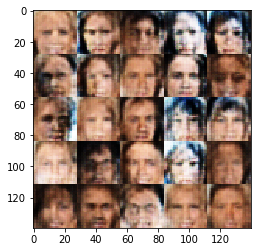

Epoch 1/1 - Step 1920... Discriminator Loss: 1.3556... Generator Loss: 0.9444
Epoch 1/1 - Step 1940... Discriminator Loss: 1.1617... Generator Loss: 0.9479
Epoch 1/1 - Step 1960... Discriminator Loss: 1.3672... Generator Loss: 0.8454
Epoch 1/1 - Step 1980... Discriminator Loss: 1.3660... Generator Loss: 0.7454
Epoch 1/1 - Step 2000... Discriminator Loss: 1.3494... Generator Loss: 0.7436


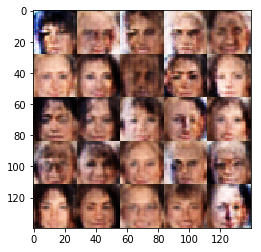

Epoch 1/1 - Step 2020... Discriminator Loss: 1.3569... Generator Loss: 0.7344
Epoch 1/1 - Step 2040... Discriminator Loss: 1.3453... Generator Loss: 0.7734
Epoch 1/1 - Step 2060... Discriminator Loss: 1.3349... Generator Loss: 0.7477
Epoch 1/1 - Step 2080... Discriminator Loss: 1.3786... Generator Loss: 0.9061
Epoch 1/1 - Step 2100... Discriminator Loss: 1.2920... Generator Loss: 0.9462


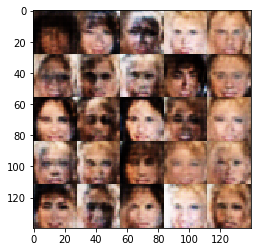

Epoch 1/1 - Step 2120... Discriminator Loss: 1.3387... Generator Loss: 0.8147
Epoch 1/1 - Step 2140... Discriminator Loss: 1.3504... Generator Loss: 0.7513
Epoch 1/1 - Step 2160... Discriminator Loss: 1.2464... Generator Loss: 1.1412
Epoch 1/1 - Step 2180... Discriminator Loss: 1.2079... Generator Loss: 0.9125
Epoch 1/1 - Step 2200... Discriminator Loss: 1.3570... Generator Loss: 0.7749


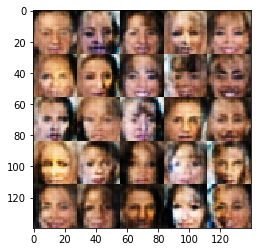

Epoch 1/1 - Step 2220... Discriminator Loss: 1.4034... Generator Loss: 0.9045
Epoch 1/1 - Step 2240... Discriminator Loss: 1.3168... Generator Loss: 0.8835
Epoch 1/1 - Step 2260... Discriminator Loss: 1.3882... Generator Loss: 0.8437
Epoch 1/1 - Step 2280... Discriminator Loss: 1.2605... Generator Loss: 0.8492
Epoch 1/1 - Step 2300... Discriminator Loss: 1.2148... Generator Loss: 0.9181


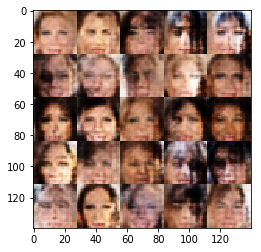

Epoch 1/1 - Step 2320... Discriminator Loss: 1.3088... Generator Loss: 1.1614
Epoch 1/1 - Step 2340... Discriminator Loss: 1.2617... Generator Loss: 0.8745
Epoch 1/1 - Step 2360... Discriminator Loss: 1.3447... Generator Loss: 0.9409
Epoch 1/1 - Step 2380... Discriminator Loss: 1.2788... Generator Loss: 0.8790
Epoch 1/1 - Step 2400... Discriminator Loss: 1.1775... Generator Loss: 0.9715


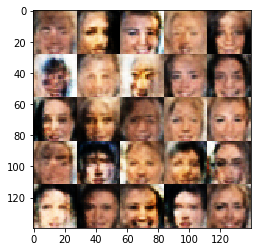

Epoch 1/1 - Step 2420... Discriminator Loss: 1.2998... Generator Loss: 1.0225
Epoch 1/1 - Step 2440... Discriminator Loss: 1.3955... Generator Loss: 1.0805
Epoch 1/1 - Step 2460... Discriminator Loss: 1.3143... Generator Loss: 0.9760
Epoch 1/1 - Step 2480... Discriminator Loss: 1.3786... Generator Loss: 0.6222
Epoch 1/1 - Step 2500... Discriminator Loss: 1.2671... Generator Loss: 1.0376


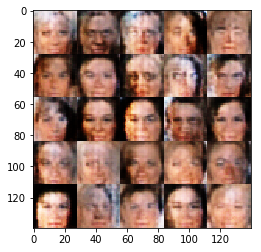

Epoch 1/1 - Step 2520... Discriminator Loss: 1.3252... Generator Loss: 1.0517
Epoch 1/1 - Step 2540... Discriminator Loss: 1.3563... Generator Loss: 0.9251
Epoch 1/1 - Step 2560... Discriminator Loss: 1.3011... Generator Loss: 0.8211
Epoch 1/1 - Step 2580... Discriminator Loss: 1.3267... Generator Loss: 0.6990
Epoch 1/1 - Step 2600... Discriminator Loss: 1.1897... Generator Loss: 0.9207


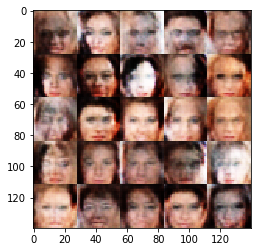

Epoch 1/1 - Step 2620... Discriminator Loss: 1.2987... Generator Loss: 0.6911
Epoch 1/1 - Step 2640... Discriminator Loss: 1.1986... Generator Loss: 1.0039
Epoch 1/1 - Step 2660... Discriminator Loss: 1.2382... Generator Loss: 0.9661
Epoch 1/1 - Step 2680... Discriminator Loss: 1.2194... Generator Loss: 0.8336
Epoch 1/1 - Step 2700... Discriminator Loss: 1.3275... Generator Loss: 0.7471


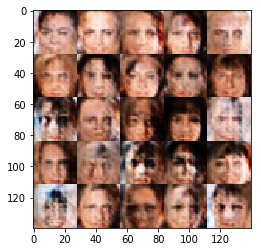

Epoch 1/1 - Step 2720... Discriminator Loss: 1.1248... Generator Loss: 0.9248
Epoch 1/1 - Step 2740... Discriminator Loss: 1.3137... Generator Loss: 0.8861
Epoch 1/1 - Step 2760... Discriminator Loss: 1.3120... Generator Loss: 0.8806
Epoch 1/1 - Step 2780... Discriminator Loss: 1.3041... Generator Loss: 0.8416
Epoch 1/1 - Step 2800... Discriminator Loss: 1.2489... Generator Loss: 0.7422


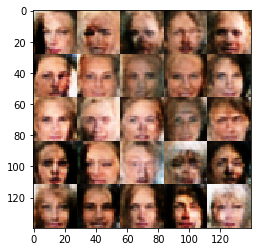

Epoch 1/1 - Step 2820... Discriminator Loss: 1.2110... Generator Loss: 0.8858
Epoch 1/1 - Step 2840... Discriminator Loss: 1.3325... Generator Loss: 1.0971
Epoch 1/1 - Step 2860... Discriminator Loss: 1.3877... Generator Loss: 0.9419
Epoch 1/1 - Step 2880... Discriminator Loss: 1.3676... Generator Loss: 0.7708
Epoch 1/1 - Step 2900... Discriminator Loss: 1.3699... Generator Loss: 1.2035


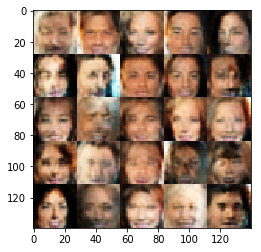

Epoch 1/1 - Step 2920... Discriminator Loss: 1.3461... Generator Loss: 0.9358
Epoch 1/1 - Step 2940... Discriminator Loss: 1.3158... Generator Loss: 0.9233
Epoch 1/1 - Step 2960... Discriminator Loss: 1.4215... Generator Loss: 0.6542
Epoch 1/1 - Step 2980... Discriminator Loss: 1.1162... Generator Loss: 1.1493
Epoch 1/1 - Step 3000... Discriminator Loss: 1.2462... Generator Loss: 0.8400


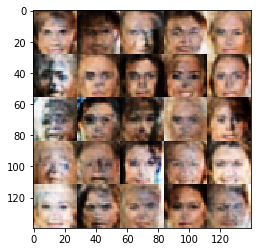

Epoch 1/1 - Step 3020... Discriminator Loss: 1.2674... Generator Loss: 0.8865
Epoch 1/1 - Step 3040... Discriminator Loss: 1.2469... Generator Loss: 0.7986
Epoch 1/1 - Step 3060... Discriminator Loss: 1.3139... Generator Loss: 0.7955
Epoch 1/1 - Step 3080... Discriminator Loss: 1.3052... Generator Loss: 0.7971
Epoch 1/1 - Step 3100... Discriminator Loss: 1.2128... Generator Loss: 0.9213


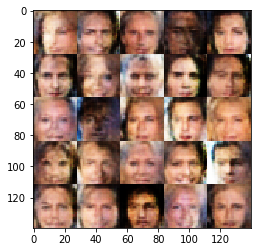

Epoch 1/1 - Step 3120... Discriminator Loss: 1.2899... Generator Loss: 0.8995
Epoch 1/1 - Step 3140... Discriminator Loss: 1.3637... Generator Loss: 0.8442
Epoch 1/1 - Step 3160... Discriminator Loss: 1.2247... Generator Loss: 0.8623
Epoch 1/1 - Step 3180... Discriminator Loss: 1.2639... Generator Loss: 0.8484
Epoch 1/1 - Step 3200... Discriminator Loss: 1.4133... Generator Loss: 1.0900


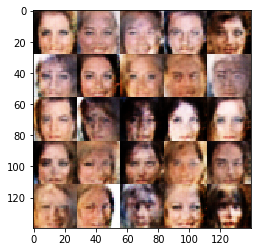

Epoch 1/1 - Step 3220... Discriminator Loss: 1.4531... Generator Loss: 0.7541
Epoch 1/1 - Step 3240... Discriminator Loss: 1.3145... Generator Loss: 0.8283
Epoch 1/1 - Step 3260... Discriminator Loss: 1.3194... Generator Loss: 0.8140
Epoch 1/1 - Step 3280... Discriminator Loss: 1.2437... Generator Loss: 0.8331
Epoch 1/1 - Step 3300... Discriminator Loss: 1.3176... Generator Loss: 0.6989


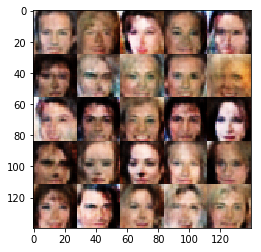

Epoch 1/1 - Step 3320... Discriminator Loss: 1.3667... Generator Loss: 0.7302
Epoch 1/1 - Step 3340... Discriminator Loss: 1.2768... Generator Loss: 0.8458
Epoch 1/1 - Step 3360... Discriminator Loss: 1.3374... Generator Loss: 0.8069
Epoch 1/1 - Step 3380... Discriminator Loss: 1.2301... Generator Loss: 0.9669
Epoch 1/1 - Step 3400... Discriminator Loss: 1.2477... Generator Loss: 0.8699


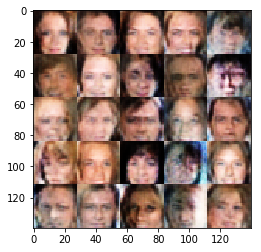

Epoch 1/1 - Step 3420... Discriminator Loss: 1.3783... Generator Loss: 0.8033
Epoch 1/1 - Step 3440... Discriminator Loss: 1.3164... Generator Loss: 0.7462
Epoch 1/1 - Step 3460... Discriminator Loss: 1.2503... Generator Loss: 0.8269
Epoch 1/1 - Step 3480... Discriminator Loss: 1.2463... Generator Loss: 0.9052
Epoch 1/1 - Step 3500... Discriminator Loss: 1.2935... Generator Loss: 0.8054


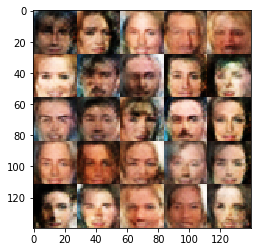

Epoch 1/1 - Step 3520... Discriminator Loss: 1.3558... Generator Loss: 0.7732
Epoch 1/1 - Step 3540... Discriminator Loss: 1.3874... Generator Loss: 0.9254
Epoch 1/1 - Step 3560... Discriminator Loss: 1.2181... Generator Loss: 0.7992
Epoch 1/1 - Step 3580... Discriminator Loss: 1.2253... Generator Loss: 0.8115
Epoch 1/1 - Step 3600... Discriminator Loss: 1.3070... Generator Loss: 0.8531


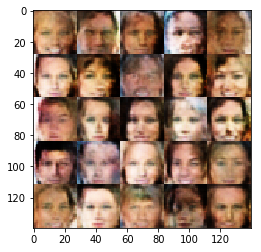

Epoch 1/1 - Step 3620... Discriminator Loss: 1.3464... Generator Loss: 0.7770
Epoch 1/1 - Step 3640... Discriminator Loss: 1.2716... Generator Loss: 0.8904
Epoch 1/1 - Step 3660... Discriminator Loss: 1.2700... Generator Loss: 0.7945
Epoch 1/1 - Step 3680... Discriminator Loss: 1.3523... Generator Loss: 0.7627
Epoch 1/1 - Step 3700... Discriminator Loss: 1.2876... Generator Loss: 1.0967


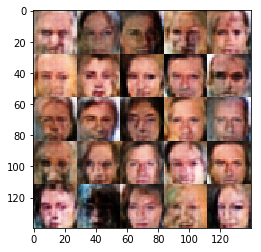

Epoch 1/1 - Step 3720... Discriminator Loss: 1.2753... Generator Loss: 0.8405
Epoch 1/1 - Step 3740... Discriminator Loss: 1.3574... Generator Loss: 0.7236
Epoch 1/1 - Step 3760... Discriminator Loss: 1.2965... Generator Loss: 0.8447
Epoch 1/1 - Step 3780... Discriminator Loss: 1.1024... Generator Loss: 1.0467
Epoch 1/1 - Step 3800... Discriminator Loss: 1.3522... Generator Loss: 0.7852


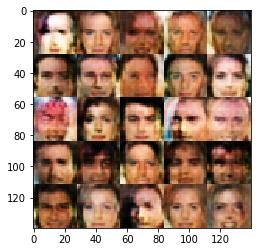

Epoch 1/1 - Step 3820... Discriminator Loss: 1.3812... Generator Loss: 0.7864
Epoch 1/1 - Step 3840... Discriminator Loss: 1.1892... Generator Loss: 0.9738
Epoch 1/1 - Step 3860... Discriminator Loss: 1.2394... Generator Loss: 1.0263
Epoch 1/1 - Step 3880... Discriminator Loss: 1.2800... Generator Loss: 0.7857
Epoch 1/1 - Step 3900... Discriminator Loss: 1.2329... Generator Loss: 0.9884


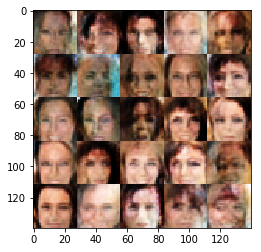

Epoch 1/1 - Step 3920... Discriminator Loss: 1.3720... Generator Loss: 0.8876
Epoch 1/1 - Step 3940... Discriminator Loss: 1.3389... Generator Loss: 0.7764
Epoch 1/1 - Step 3960... Discriminator Loss: 1.3269... Generator Loss: 0.8177
Epoch 1/1 - Step 3980... Discriminator Loss: 1.2664... Generator Loss: 0.8652
Epoch 1/1 - Step 4000... Discriminator Loss: 1.2467... Generator Loss: 0.9621


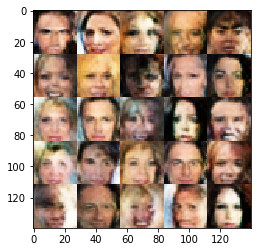

Epoch 1/1 - Step 4020... Discriminator Loss: 1.3807... Generator Loss: 0.6694
Epoch 1/1 - Step 4040... Discriminator Loss: 1.3764... Generator Loss: 0.7568
Epoch 1/1 - Step 4060... Discriminator Loss: 1.3127... Generator Loss: 0.8250
Epoch 1/1 - Step 4080... Discriminator Loss: 1.3382... Generator Loss: 0.8063
Epoch 1/1 - Step 4100... Discriminator Loss: 1.3023... Generator Loss: 0.8554


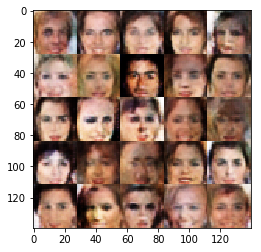

Epoch 1/1 - Step 4120... Discriminator Loss: 1.3432... Generator Loss: 0.7581
Epoch 1/1 - Step 4140... Discriminator Loss: 1.3248... Generator Loss: 0.8417
Epoch 1/1 - Step 4160... Discriminator Loss: 1.3514... Generator Loss: 0.7964
Epoch 1/1 - Step 4180... Discriminator Loss: 1.2508... Generator Loss: 0.9397
Epoch 1/1 - Step 4200... Discriminator Loss: 1.2907... Generator Loss: 0.7837


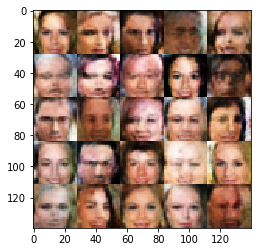

Epoch 1/1 - Step 4220... Discriminator Loss: 1.3305... Generator Loss: 0.9010
Epoch 1/1 - Step 4240... Discriminator Loss: 1.2551... Generator Loss: 1.0307
Epoch 1/1 - Step 4260... Discriminator Loss: 1.3041... Generator Loss: 0.8806
Epoch 1/1 - Step 4280... Discriminator Loss: 1.2141... Generator Loss: 0.9974
Epoch 1/1 - Step 4300... Discriminator Loss: 1.2809... Generator Loss: 0.8789


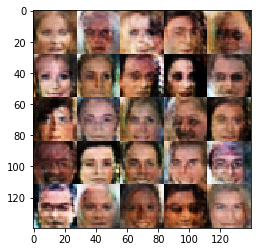

Epoch 1/1 - Step 4320... Discriminator Loss: 1.2982... Generator Loss: 0.7987
Epoch 1/1 - Step 4340... Discriminator Loss: 1.2510... Generator Loss: 0.9039
Epoch 1/1 - Step 4360... Discriminator Loss: 1.2624... Generator Loss: 0.8687
Epoch 1/1 - Step 4380... Discriminator Loss: 1.2896... Generator Loss: 0.7374
Epoch 1/1 - Step 4400... Discriminator Loss: 1.3637... Generator Loss: 0.8517


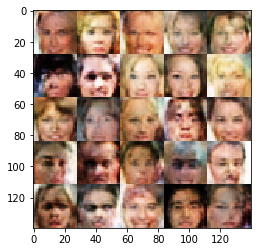

Epoch 1/1 - Step 4420... Discriminator Loss: 1.2853... Generator Loss: 0.7731
Epoch 1/1 - Step 4440... Discriminator Loss: 1.2607... Generator Loss: 0.7989
Epoch 1/1 - Step 4460... Discriminator Loss: 1.3217... Generator Loss: 0.9165
Epoch 1/1 - Step 4480... Discriminator Loss: 1.3387... Generator Loss: 0.7783
Epoch 1/1 - Step 4500... Discriminator Loss: 1.2981... Generator Loss: 0.8661


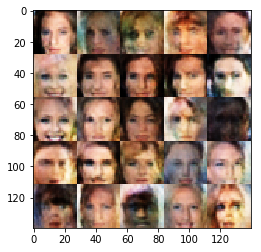

Epoch 1/1 - Step 4520... Discriminator Loss: 1.2995... Generator Loss: 0.8789
Epoch 1/1 - Step 4540... Discriminator Loss: 1.2632... Generator Loss: 0.8626
Epoch 1/1 - Step 4560... Discriminator Loss: 1.2504... Generator Loss: 1.0172
Epoch 1/1 - Step 4580... Discriminator Loss: 1.3255... Generator Loss: 0.9093
Epoch 1/1 - Step 4600... Discriminator Loss: 1.3581... Generator Loss: 0.8393


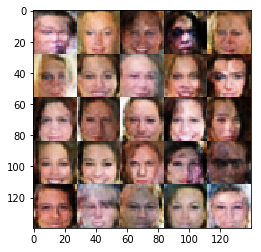

Epoch 1/1 - Step 4620... Discriminator Loss: 1.2986... Generator Loss: 0.8205
Epoch 1/1 - Step 4640... Discriminator Loss: 1.3298... Generator Loss: 0.7842
Epoch 1/1 - Step 4660... Discriminator Loss: 1.2689... Generator Loss: 0.8792
Epoch 1/1 - Step 4680... Discriminator Loss: 1.2009... Generator Loss: 0.8949
Epoch 1/1 - Step 4700... Discriminator Loss: 1.2491... Generator Loss: 0.8671


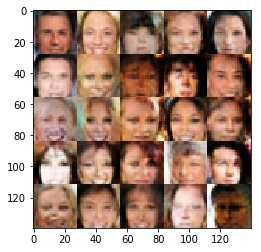

Epoch 1/1 - Step 4720... Discriminator Loss: 1.3386... Generator Loss: 0.7801
Epoch 1/1 - Step 4740... Discriminator Loss: 1.3534... Generator Loss: 0.7808
Epoch 1/1 - Step 4760... Discriminator Loss: 1.3448... Generator Loss: 0.8157
Epoch 1/1 - Step 4780... Discriminator Loss: 1.3645... Generator Loss: 0.7659
Epoch 1/1 - Step 4800... Discriminator Loss: 1.3208... Generator Loss: 0.8264


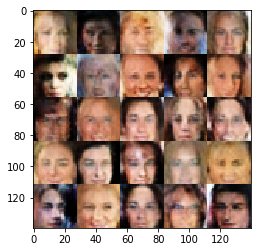

Epoch 1/1 - Step 4820... Discriminator Loss: 1.3571... Generator Loss: 0.8137
Epoch 1/1 - Step 4840... Discriminator Loss: 1.2591... Generator Loss: 0.8897
Epoch 1/1 - Step 4860... Discriminator Loss: 1.3446... Generator Loss: 0.8161
Epoch 1/1 - Step 4880... Discriminator Loss: 1.3165... Generator Loss: 0.8886
Epoch 1/1 - Step 4900... Discriminator Loss: 1.3523... Generator Loss: 0.8922


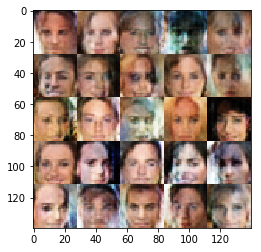

Epoch 1/1 - Step 4920... Discriminator Loss: 1.2924... Generator Loss: 0.7973
Epoch 1/1 - Step 4940... Discriminator Loss: 1.3307... Generator Loss: 0.9011
Epoch 1/1 - Step 4960... Discriminator Loss: 1.2387... Generator Loss: 0.8193
Epoch 1/1 - Step 4980... Discriminator Loss: 1.2983... Generator Loss: 0.9440
Epoch 1/1 - Step 5000... Discriminator Loss: 1.2219... Generator Loss: 0.8786


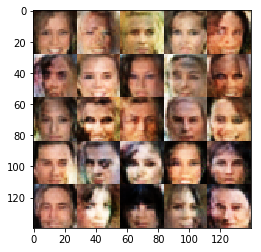

Epoch 1/1 - Step 5020... Discriminator Loss: 1.2786... Generator Loss: 0.8920
Epoch 1/1 - Step 5040... Discriminator Loss: 1.3390... Generator Loss: 0.7758
Epoch 1/1 - Step 5060... Discriminator Loss: 1.2886... Generator Loss: 0.9483
Epoch 1/1 - Step 5080... Discriminator Loss: 1.4756... Generator Loss: 0.5922
Epoch 1/1 - Step 5100... Discriminator Loss: 1.3538... Generator Loss: 0.8527


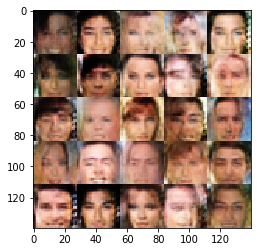

Epoch 1/1 - Step 5120... Discriminator Loss: 1.3692... Generator Loss: 0.9193
Epoch 1/1 - Step 5140... Discriminator Loss: 1.2597... Generator Loss: 0.8842
Epoch 1/1 - Step 5160... Discriminator Loss: 1.2441... Generator Loss: 0.8558
Epoch 1/1 - Step 5180... Discriminator Loss: 1.2719... Generator Loss: 0.9488
Epoch 1/1 - Step 5200... Discriminator Loss: 1.2030... Generator Loss: 0.8955


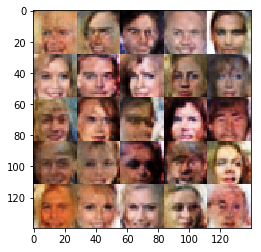

Epoch 1/1 - Step 5220... Discriminator Loss: 1.4042... Generator Loss: 0.7800
Epoch 1/1 - Step 5240... Discriminator Loss: 1.3485... Generator Loss: 0.7791
Epoch 1/1 - Step 5260... Discriminator Loss: 1.3406... Generator Loss: 0.7351
Epoch 1/1 - Step 5280... Discriminator Loss: 1.2767... Generator Loss: 0.8959
Epoch 1/1 - Step 5300... Discriminator Loss: 1.3496... Generator Loss: 0.8818


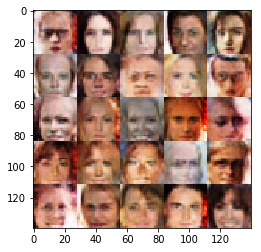

Epoch 1/1 - Step 5320... Discriminator Loss: 1.3335... Generator Loss: 0.8708
Epoch 1/1 - Step 5340... Discriminator Loss: 1.2029... Generator Loss: 0.8922
Epoch 1/1 - Step 5360... Discriminator Loss: 1.2390... Generator Loss: 0.8957
Epoch 1/1 - Step 5380... Discriminator Loss: 1.3258... Generator Loss: 0.8196
Epoch 1/1 - Step 5400... Discriminator Loss: 1.3000... Generator Loss: 0.8997


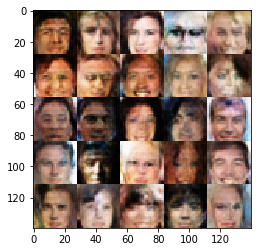

Epoch 1/1 - Step 5420... Discriminator Loss: 1.2203... Generator Loss: 0.8402
Epoch 1/1 - Step 5440... Discriminator Loss: 1.2943... Generator Loss: 0.9337
Epoch 1/1 - Step 5460... Discriminator Loss: 1.3386... Generator Loss: 0.8602
Epoch 1/1 - Step 5480... Discriminator Loss: 1.2664... Generator Loss: 0.8184
Epoch 1/1 - Step 5500... Discriminator Loss: 1.2848... Generator Loss: 0.8476


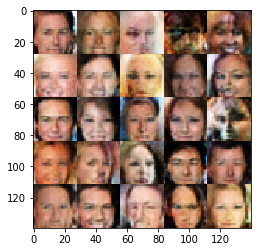

Epoch 1/1 - Step 5520... Discriminator Loss: 1.2868... Generator Loss: 0.9221
Epoch 1/1 - Step 5540... Discriminator Loss: 1.2581... Generator Loss: 0.8052
Epoch 1/1 - Step 5560... Discriminator Loss: 1.1599... Generator Loss: 1.1152
Epoch 1/1 - Step 5580... Discriminator Loss: 1.3568... Generator Loss: 0.8507
Epoch 1/1 - Step 5600... Discriminator Loss: 1.2973... Generator Loss: 0.8266


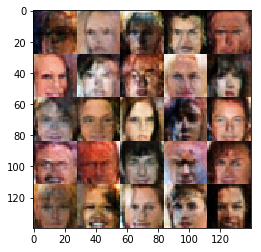

Epoch 1/1 - Step 5620... Discriminator Loss: 1.1709... Generator Loss: 0.8692
Epoch 1/1 - Step 5640... Discriminator Loss: 1.1855... Generator Loss: 0.8739
Epoch 1/1 - Step 5660... Discriminator Loss: 1.2428... Generator Loss: 0.8100
Epoch 1/1 - Step 5680... Discriminator Loss: 1.2348... Generator Loss: 0.8338
Epoch 1/1 - Step 5700... Discriminator Loss: 1.2277... Generator Loss: 0.8659


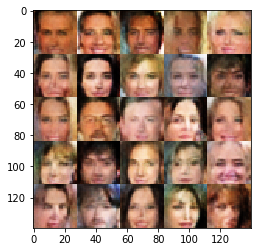

Epoch 1/1 - Step 5720... Discriminator Loss: 1.2717... Generator Loss: 0.9534
Epoch 1/1 - Step 5740... Discriminator Loss: 1.4049... Generator Loss: 0.8775
Epoch 1/1 - Step 5760... Discriminator Loss: 1.2552... Generator Loss: 0.9274
Epoch 1/1 - Step 5780... Discriminator Loss: 1.1894... Generator Loss: 0.8796
Epoch 1/1 - Step 5800... Discriminator Loss: 1.3263... Generator Loss: 0.6649


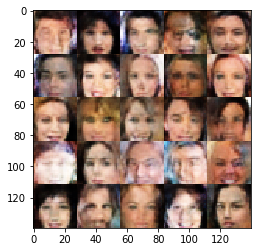

Epoch 1/1 - Step 5820... Discriminator Loss: 1.2785... Generator Loss: 0.9019
Epoch 1/1 - Step 5840... Discriminator Loss: 1.3454... Generator Loss: 0.8919
Epoch 1/1 - Step 5860... Discriminator Loss: 1.3498... Generator Loss: 0.9392
Epoch 1/1 - Step 5880... Discriminator Loss: 1.2676... Generator Loss: 1.0168
Epoch 1/1 - Step 5900... Discriminator Loss: 1.3423... Generator Loss: 0.7652


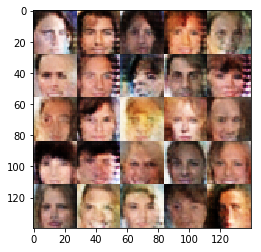

Epoch 1/1 - Step 5920... Discriminator Loss: 1.2951... Generator Loss: 0.8321
Epoch 1/1 - Step 5940... Discriminator Loss: 1.2477... Generator Loss: 0.8952
Epoch 1/1 - Step 5960... Discriminator Loss: 1.3640... Generator Loss: 0.9834
Epoch 1/1 - Step 5980... Discriminator Loss: 1.3279... Generator Loss: 0.8942
Epoch 1/1 - Step 6000... Discriminator Loss: 1.2866... Generator Loss: 0.8179


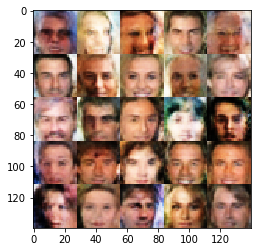

Epoch 1/1 - Step 6020... Discriminator Loss: 1.3092... Generator Loss: 0.7922
Epoch 1/1 - Step 6040... Discriminator Loss: 1.3380... Generator Loss: 0.9383
Epoch 1/1 - Step 6060... Discriminator Loss: 1.3281... Generator Loss: 0.7527
Epoch 1/1 - Step 6080... Discriminator Loss: 1.2678... Generator Loss: 0.9174
Epoch 1/1 - Step 6100... Discriminator Loss: 1.2172... Generator Loss: 0.8722


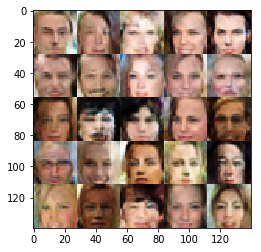

Epoch 1/1 - Step 6120... Discriminator Loss: 1.2807... Generator Loss: 0.7899
Epoch 1/1 - Step 6140... Discriminator Loss: 1.1645... Generator Loss: 0.8465
Epoch 1/1 - Step 6160... Discriminator Loss: 1.2663... Generator Loss: 0.8582
Epoch 1/1 - Step 6180... Discriminator Loss: 1.3011... Generator Loss: 0.9109
Epoch 1/1 - Step 6200... Discriminator Loss: 1.2743... Generator Loss: 0.9295


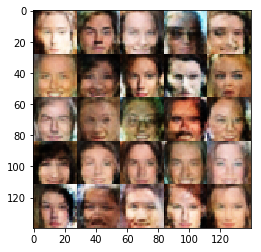

Epoch 1/1 - Step 6220... Discriminator Loss: 1.3266... Generator Loss: 0.8728
Epoch 1/1 - Step 6240... Discriminator Loss: 1.2438... Generator Loss: 0.8809
Epoch 1/1 - Step 6260... Discriminator Loss: 1.3064... Generator Loss: 0.8147
Epoch 1/1 - Step 6280... Discriminator Loss: 1.3627... Generator Loss: 0.7742
Epoch 1/1 - Step 6300... Discriminator Loss: 1.2269... Generator Loss: 0.8113


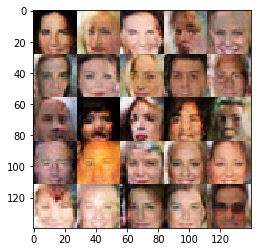

Epoch 1/1 - Step 6320... Discriminator Loss: 1.2887... Generator Loss: 0.7791
Epoch 1/1 - Step 6331... Discriminator Loss: 1.2981... Generator Loss: 1.0205


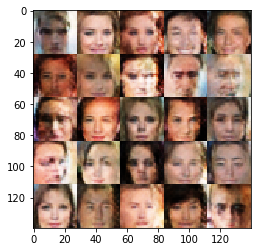

In [74]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

tf.reset_default_graph()


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.